## Set up the environment

In [ ]:
!pip install nilearn

In [ ]:
import zipfile
import gdown

import os
import cv2
import glob
import PIL
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import montage
import skimage.transform as skTrans
from skimage.transform import rotate
from skimage.transform import resize
from PIL import Image, ImageOps


# neural imaging
import nilearn as nl
import nibabel as nib
import nilearn.plotting as nlplt
!pip install git+https://github.com/miykael/gif_your_nifti # nifti to gif
import gif_your_nifti.core as gif2nif


# ml libs
import keras
import tensorflow.keras.backend as K
from keras.callbacks import CSVLogger
import tensorflow as tf
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping, TensorBoard
from tensorflow.keras.layers import *

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

  Cloning https://github.com/miykael/gif_your_nifti to /tmp/pip-req-build-0hrwz5ya
  Running command git clone --filter=blob:none --quiet https://github.com/miykael/gif_your_nifti /tmp/pip-req-build-0hrwz5ya
  Resolved https://github.com/miykael/gif_your_nifti to commit 55c09c42921f4871cf43f63a303ab420a92a4f03
  Preparing metadata (setup.py) ... done
  Created wheel for gif_your_nifti: filename=gif_your_nifti-0.2.2-py3-none-any.whl size=6632 sha256=f1a8255d7ecb5102f9dbc56c21657df98123a36e62d5706322e6dfc6fcca8fcc
  Stored in directory: /tmp/pip-ephem-wheel-cache-4l3pjg5g/wheels/de/6d/35/5b931fbea2039fbd2ac937828c719c3cdd70953235af24b9ab
Successfully built gif_your_nifti


In [ ]:
# DEFINE seg-areas
SEGMENT_CLASSES = {
    0 : 'NOT tumor',
    1 : 'NECROTIC/CORE', # or NON-ENHANCING tumor CORE
    2 : 'EDEMA',
    3 : 'ENHANCING' # original 4 -> converted into 3 later
}

# there are 155 slices per volume
# to start at 5 and use 145 slices means we will skip the first 5 and last 5
VOLUME_SLICES = 100
VOLUME_START_AT = 22 # first slice of volume that we will include

In [ ]:
#https://drive.google.com/drive/folders/uc?id=1s6rFgHw85O9SpHY53AKjkn_vTo_ateVf
nii_url = "https://drive.google.com/drive/folders/uc?id=1s6rFgHw85O9SpHY53AKjkn_vTo_ateVf"
nii_output = "nii"
gdown.download_folder(id = "1s6rFgHw85O9SpHY53AKjkn_vTo_ateVf", output=nii_output)

Retrieving folder contents


Processing file 1x4yV4lQmqa29qhQ9AjCs46YeX1UuZIem 2.nii.gz
Processing file 1f5YSf14Z9nlHVzw_3n-XnChBsKI9fAzp 4.nii.gz
Processing file 1_7RpNILrafKll4Pr0hgItsoy51VEpuhN 6.nii.gz
Processing file 15Hs0NU367C-tB-QvuYM21T8VRwgbh7T3 7.nii.gz
Processing file 18Y3wrULX1TSsbIIVeLV2RUaahzropxNt 8.nii.gz
Processing file 1DOMIaJYPY-Xepzl1_R8iOxWeRaLRyAxv 14.nii.gz
Processing file 1x-35ngh6pGwDPJ2irX5IJldGKVRPk8Md 15.nii.gz
Processing file 1YLokoF8j1kJKo6RqllpsGf_fdfdAbLLa 17.nii.gz
Processing file 1KRdrbwqeJNQllicC8BZSNxuiGcda93Rz 27.nii.gz
Processing file 1DAGNXFmCpwZ2K95NTeE0hECt8nPAqg6O 28.nii.gz


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1x4yV4lQmqa29qhQ9AjCs46YeX1UuZIem
To: /content/nii/2.nii.gz
100%|██████████| 10.8M/10.8M [00:00<00:00, 53.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1f5YSf14Z9nlHVzw_3n-XnChBsKI9fAzp
To: /content/nii/4.nii.gz
100%|██████████| 8.45M/8.45M [00:00<00:00, 36.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1_7RpNILrafKll4Pr0hgItsoy51VEpuhN
To: /content/nii/6.nii.gz
100%|██████████| 346k/346k [00:00<00:00, 92.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=15Hs0NU367C-tB-QvuYM21T8VRwgbh7T3
To: /content/nii/7.nii.gz
100%|██████████| 235k/235k [00:00<00:00, 98.1MB/s]
Downloading...
From: https://drive.google.com/uc?id=18Y3wrULX1TSsbIIVeLV2RUaahzropxNt
To: /content/nii/8.nii.gz
100%|██████████| 323k/323k [00:00<00:00, 110MB/s]
Downloading...
From: https://drive.google.com/uc?id=1DOMIaJYPY-Xepzl1_R8iOxWe

['nii/2.nii.gz',
 'nii/4.nii.gz',
 'nii/6.nii.gz',
 'nii/7.nii.gz',
 'nii/8.nii.gz',
 'nii/14.nii.gz',
 'nii/15.nii.gz',
 'nii/17.nii.gz',
 'nii/27.nii.gz',
 'nii/28.nii.gz']

In [ ]:
# Download validation and training datasets

training_url = "https://drive.google.com/uc?id=1aFEm6tdSsSSRfWLhE3Fc7kOf4e5Cy3jf"
training_output = "trainingCheckpointFile"
gdown.download(training_url, training_output)

validation_url = "https://drive.google.com/uc?id=1X5kOM797CNuONQ1juAxYfxa7IXE15GGH"
validation_output = "validationCheckpointFile"
gdown.download(validation_url, validation_output)

Downloading...
From (original): https://drive.google.com/uc?id=1aFEm6tdSsSSRfWLhE3Fc7kOf4e5Cy3jf
From (redirected): https://drive.google.com/uc?id=1aFEm6tdSsSSRfWLhE3Fc7kOf4e5Cy3jf&confirm=t&uuid=88742e64-2278-4530-936a-410cf6a5f502
To: /content/trainingCheckpointFile
100%|██████████| 3.26G/3.26G [00:46<00:00, 70.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1X5kOM797CNuONQ1juAxYfxa7IXE15GGH
From (redirected): https://drive.google.com/uc?id=1X5kOM797CNuONQ1juAxYfxa7IXE15GGH&confirm=t&uuid=edebbf0f-cb53-4355-b958-c5bb8c1ee087
To: /content/validationCheckpointFile
100%|██████████| 1.21G/1.21G [00:16<00:00, 73.9MB/s]


'validationCheckpointFile'

In [ ]:
# Unzip validation and training checkpoint files

with zipfile.ZipFile(training_output, 'r') as zip_ref:
    zip_ref.extractall("input_folder")

with zipfile.ZipFile(validation_output, 'r') as zip_ref:
    zip_ref.extractall("input_folder")

## Data analysis

Text(0.5, 1.0, 'Image t2')

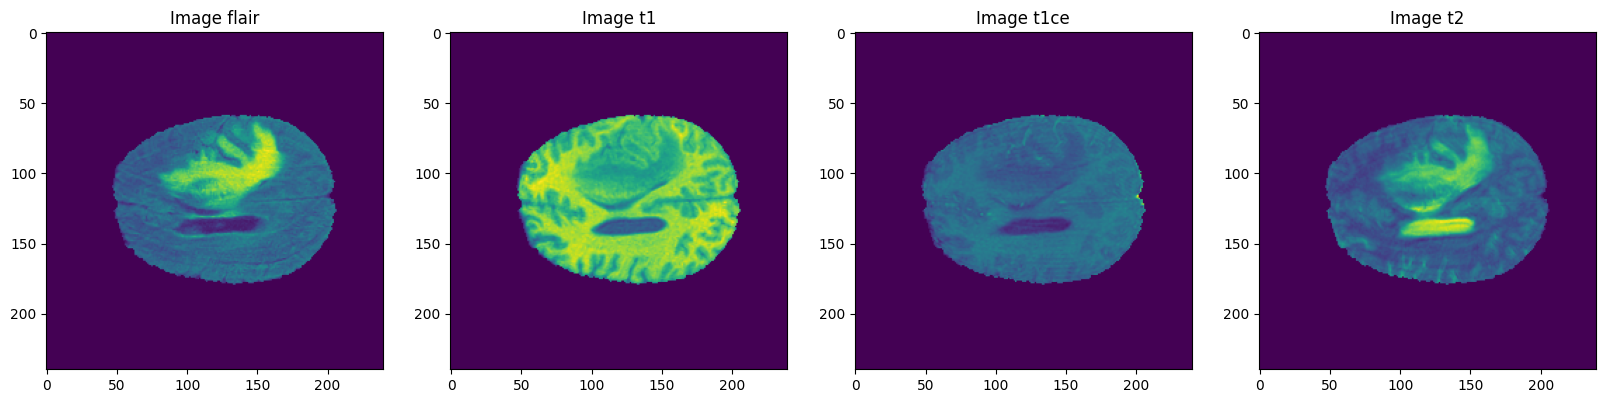

In [ ]:
TRAIN_DATASET_PATH = '/content/input_folder/MICCAI_BraTS2020_TrainingData/'
VALIDATION_DATASET_PATH = '/content/input_folder/MICCAI_BraTS2020_ValidationData'

# The command .get_fdata() returns a 3 dimension numpy array. For example, test_image_flair.shape = (255,255,150)
test_image_flair=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_flair.nii').get_fdata()
test_image_t1=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t1.nii').get_fdata()
test_image_t1ce=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t1ce.nii').get_fdata()
test_image_t2=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_t2.nii').get_fdata()
test_mask=nib.load(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_seg.nii').get_fdata()


fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (20, 10))
slice_w = 25
ax1.imshow(test_image_flair[:,:,test_image_flair.shape[0]//2-slice_w])
ax1.set_title('Image flair')
ax2.imshow(test_image_t1[:,:,test_image_t1.shape[0]//2-slice_w])
ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce[:,:,test_image_t1ce.shape[0]//2-slice_w])
ax3.set_title('Image t1ce')
ax4.imshow(test_image_t2[:,:,test_image_t2.shape[0]//2-slice_w])
ax4.set_title('Image t2')

In [ ]:
test_mask.shape

(240, 240, 155)

In [ ]:
print(f"t2 4:{test_image_t2.shape}\nt1 7:{test_image_t1.shape}\nt1ce 2{test_image_t1ce.shape}\nflair 17:{test_image_flair.shape}")

t2 4:(580, 576, 33)
t1 7:(128, 128, 54)
t1ce 2(256, 256, 240)
flair 17:(512, 512, 240)


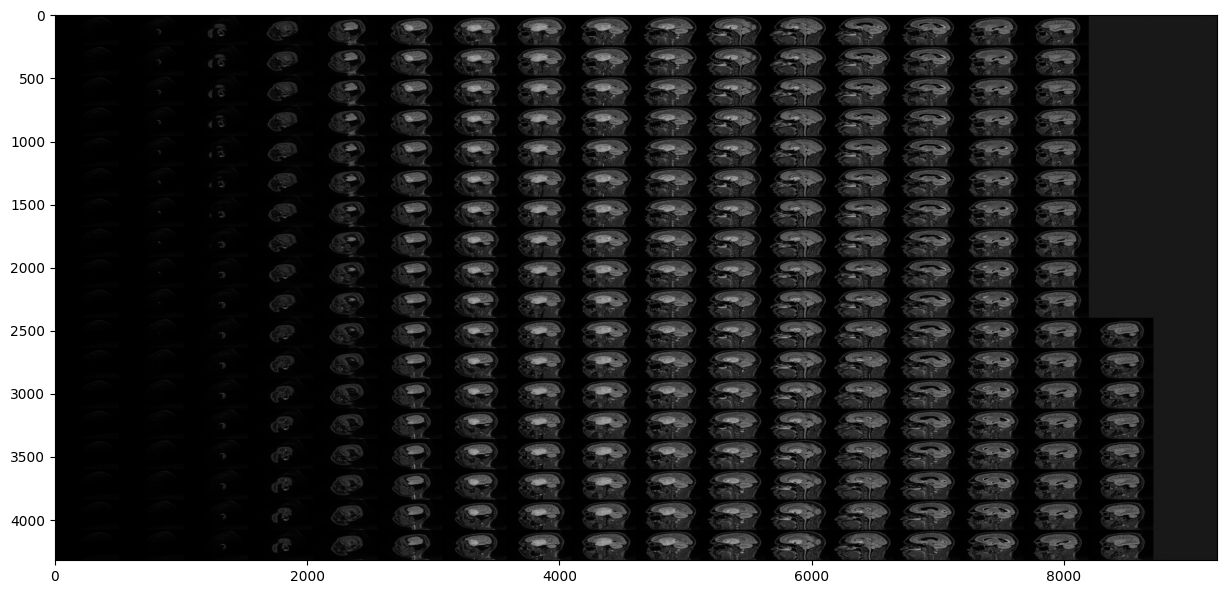

In [ ]:
# Skip 50:-50 slices since there is not much to see
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_image_flair[(3*18):(-18*9),:,:]), 90, resize=True), cmap ='gray')

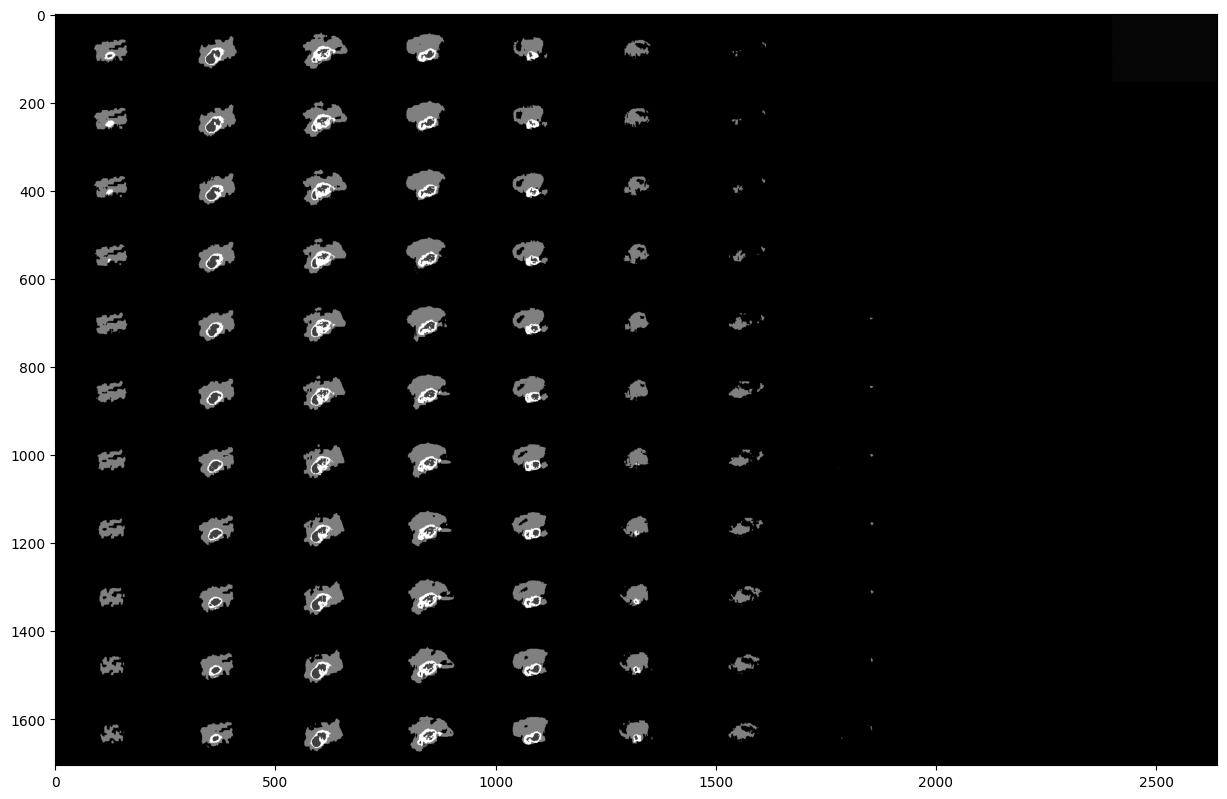

In [ ]:
# Skip 50:-50 slices since there is not much to see
fig, ax1 = plt.subplots(1, 1, figsize = (15,15))
ax1.imshow(rotate(montage(test_mask[60:-60,:,:]), 90, resize=True), cmap ='gray')

In [ ]:
# This code creates a gif and saves it in the /content/[gif_name].gif path

shutil.copy2(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_flair.nii', './test_gif_BraTS20_Training_001_flair.nii')
gif2nif.write_gif_normal('./test_gif_BraTS20_Training_001_flair.nii')

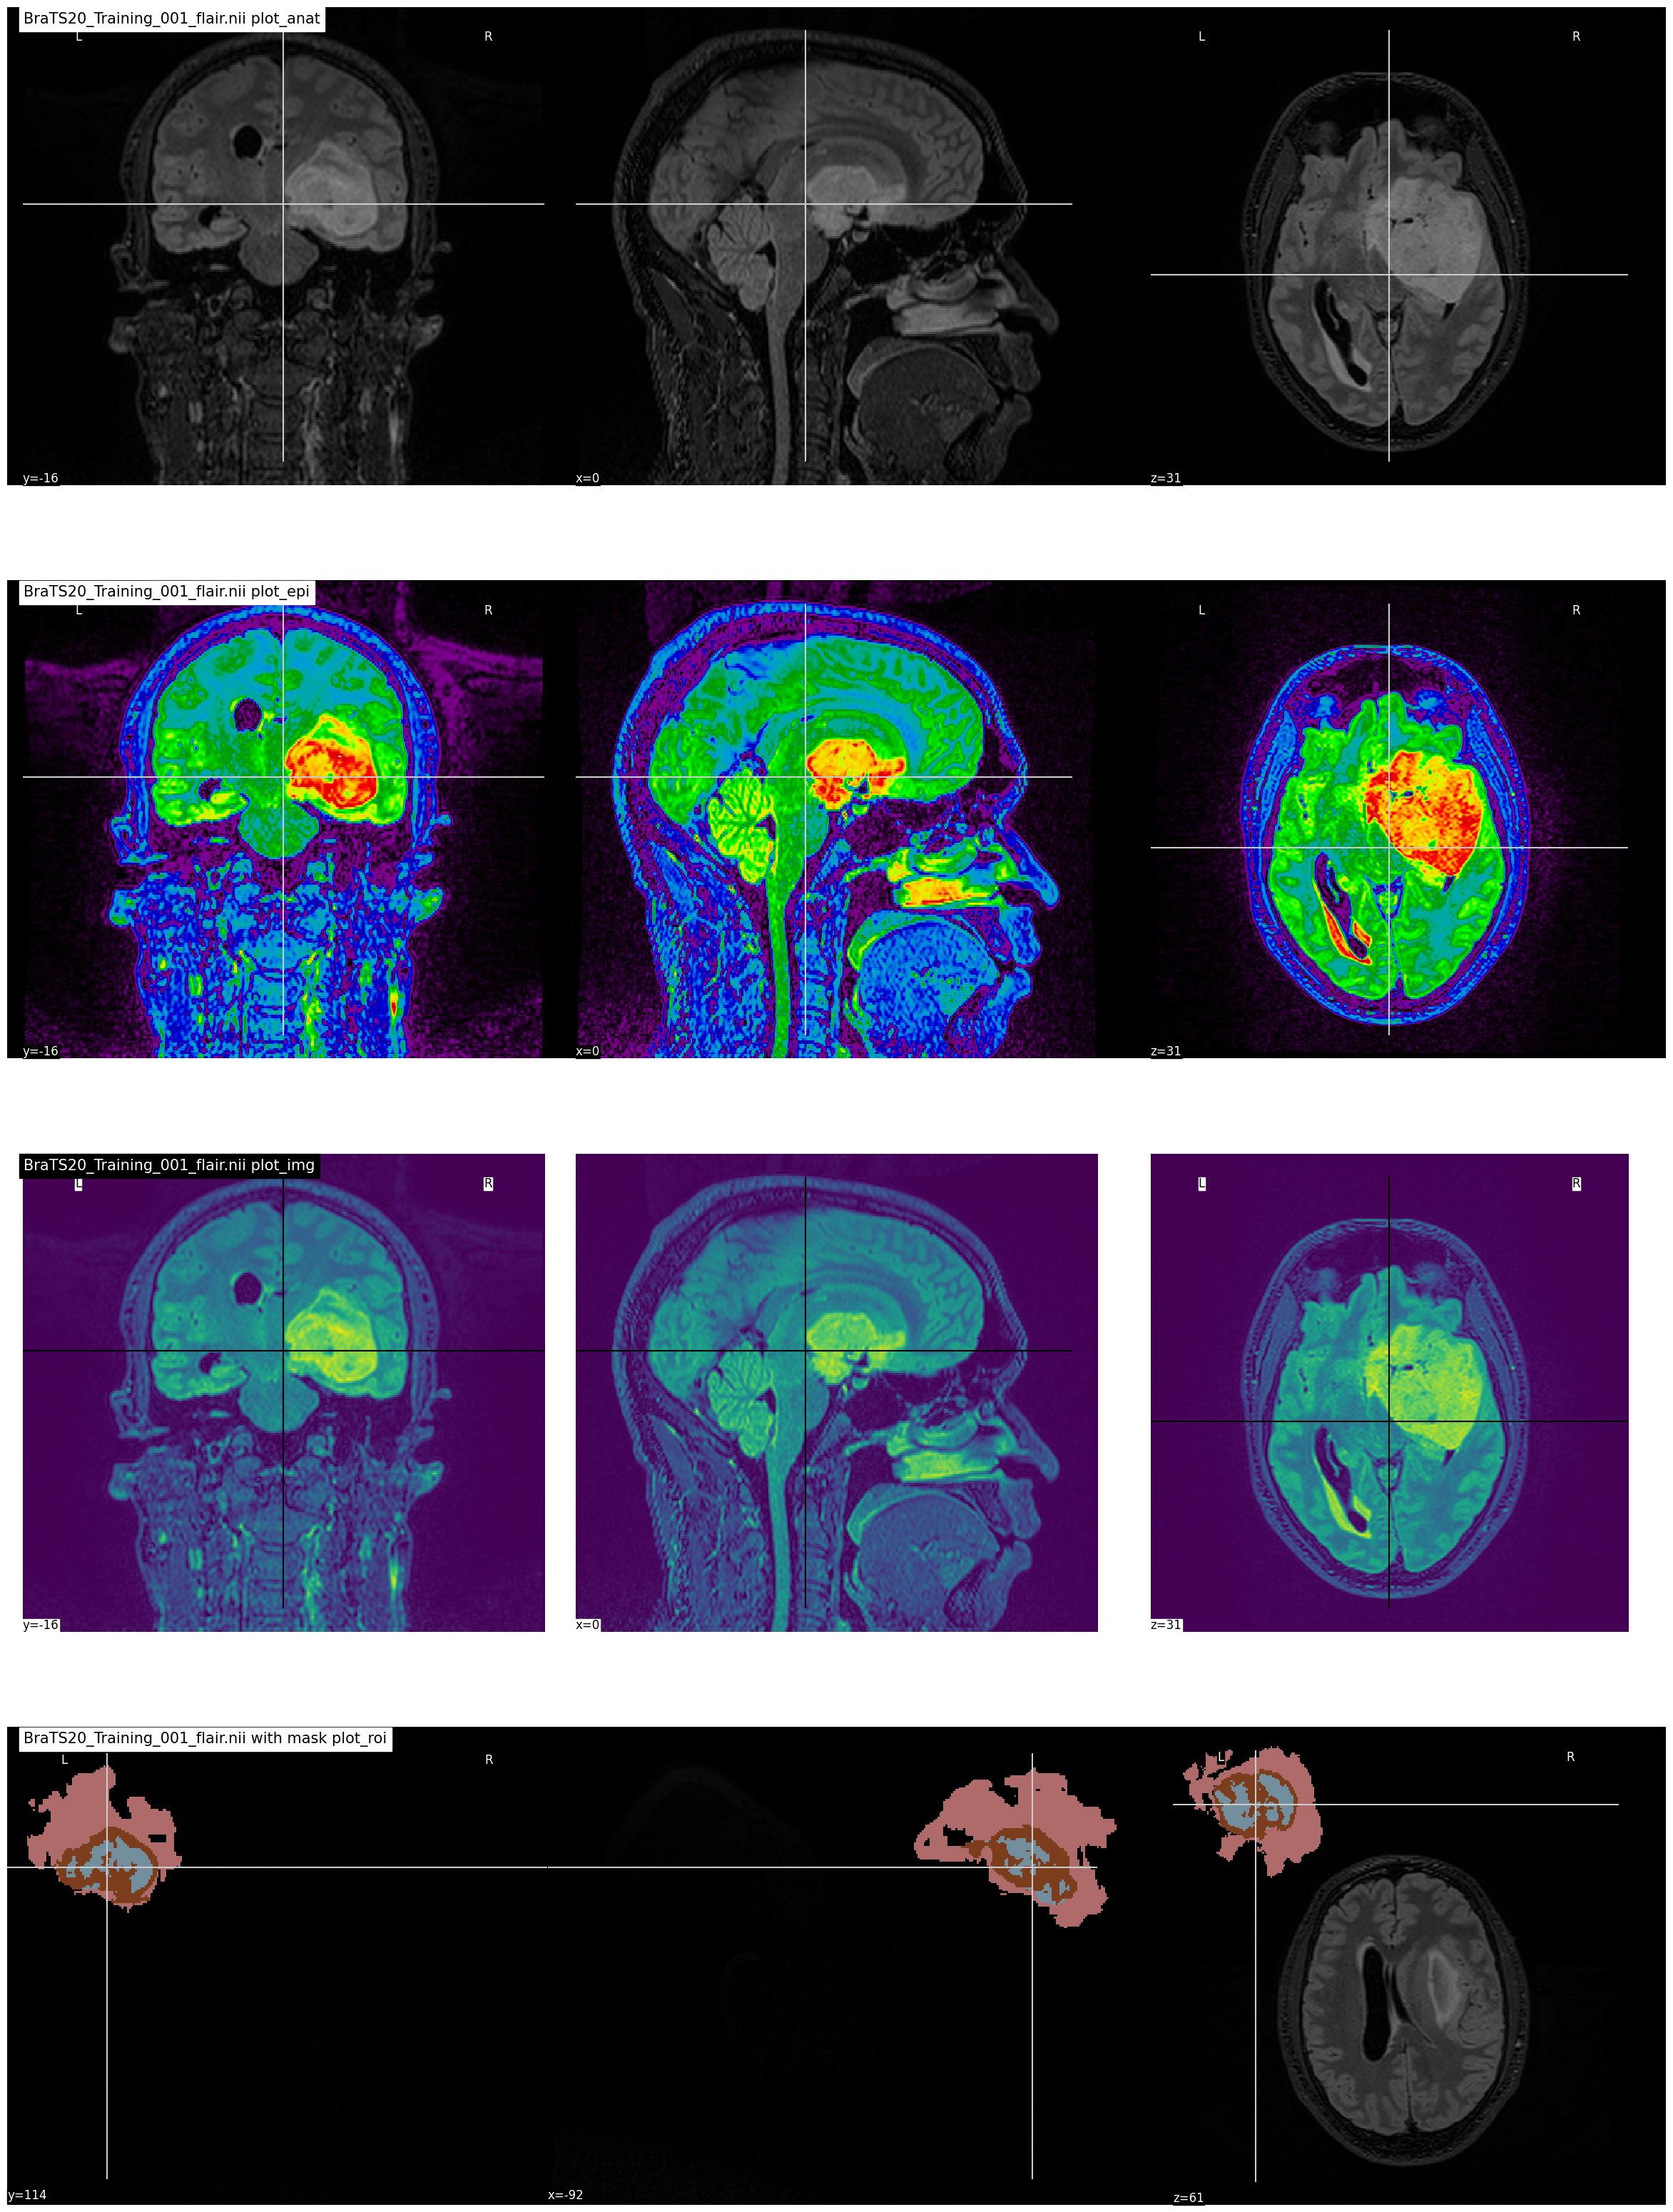

In [ ]:
niimg = nl.image.load_img('nii/17.nii.gz')
nimask = nl.image.load_img(TRAIN_DATASET_PATH + 'BraTS20_Training_001/BraTS20_Training_001_seg.nii')

fig, axes = plt.subplots(nrows=4, figsize=(30, 40))


nlplt.plot_anat(niimg,
                title='BraTS20_Training_001_flair.nii plot_anat',
                axes=axes[0])

nlplt.plot_epi(niimg,
               title='BraTS20_Training_001_flair.nii plot_epi',
               axes=axes[1])

nlplt.plot_img(niimg,
               title='BraTS20_Training_001_flair.nii plot_img',
               axes=axes[2])

nlplt.plot_roi(nimask,
               title='BraTS20_Training_001_flair.nii with mask plot_roi',
               bg_img=niimg,
               axes=axes[3], cmap='Paired')

plt.show()

## Building and training the U-Net model

In [ ]:
# dice loss as defined above for 4 classes
def dice_coef(y_true, y_pred, smooth=1.0):
    class_num = 4
    for i in range(class_num):
        y_true_f = K.flatten(y_true[:,:,:,i])
        y_pred_f = K.flatten(y_pred[:,:,:,i])
        intersection = K.sum(y_true_f * y_pred_f)
        loss = ((2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth))
   #     K.print_tensor(loss, message='loss value for class {} : '.format(SEGMENT_CLASSES[i]))
        if i == 0:
            total_loss = loss
        else:
            total_loss = total_loss + loss
    total_loss = total_loss / class_num
#    K.print_tensor(total_loss, message=' total dice coef: ')
    return total_loss



# define per class evaluation of dice coef
# inspired by https://github.com/keras-team/keras/issues/9395
def dice_coef_necrotic(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,1] * y_pred[:,:,:,1]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,1])) + K.sum(K.square(y_pred[:,:,:,1])) + epsilon)

def dice_coef_edema(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,2] * y_pred[:,:,:,2]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,2])) + K.sum(K.square(y_pred[:,:,:,2])) + epsilon)

def dice_coef_enhancing(y_true, y_pred, epsilon=1e-6):
    intersection = K.sum(K.abs(y_true[:,:,:,3] * y_pred[:,:,:,3]))
    return (2. * intersection) / (K.sum(K.square(y_true[:,:,:,3])) + K.sum(K.square(y_pred[:,:,:,3])) + epsilon)



# Computing Precision
def precision(y_true, y_pred):
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision


# Computing Sensitivity
def sensitivity(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + K.epsilon())


# Computing Specificity
def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1-y_true) * (1-y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1-y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [ ]:
IMG_SIZE=128

In [ ]:
# source https://naomi-fridman.medium.com/multi-class-image-segmentation-a5cc671e647a

def build_unet(inputs, ker_init, dropout):
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(inputs)
    conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv1)

    pool = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool)
    conv = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)

    pool1 = MaxPooling2D(pool_size=(2, 2))(conv)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool1)
    conv2 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv2)

    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool2)
    conv3 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv3)


    pool4 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(pool4)
    conv5 = Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv5)
    drop5 = Dropout(dropout)(conv5)

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(drop5))
    merge7 = concatenate([conv3,up7], axis = 3)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge7)
    conv7 = Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv7)

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv7))
    merge8 = concatenate([conv2,up8], axis = 3)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge8)
    conv8 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv8)

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv8))
    merge9 = concatenate([conv,up9], axis = 3)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge9)
    conv9 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv9)

    up = Conv2D(32, 2, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(UpSampling2D(size = (2,2))(conv9))
    merge = concatenate([conv1,up], axis = 3)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(merge)
    conv = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = ker_init)(conv)

    conv10 = Conv2D(4, (1,1), activation = 'softmax')(conv)

    return Model(inputs = inputs, outputs = conv10)

input_layer = Input((IMG_SIZE, IMG_SIZE, 2))

model = build_unet(input_layer, 'he_normal', 0.2)
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, dice_coef_edema ,dice_coef_enhancing] )

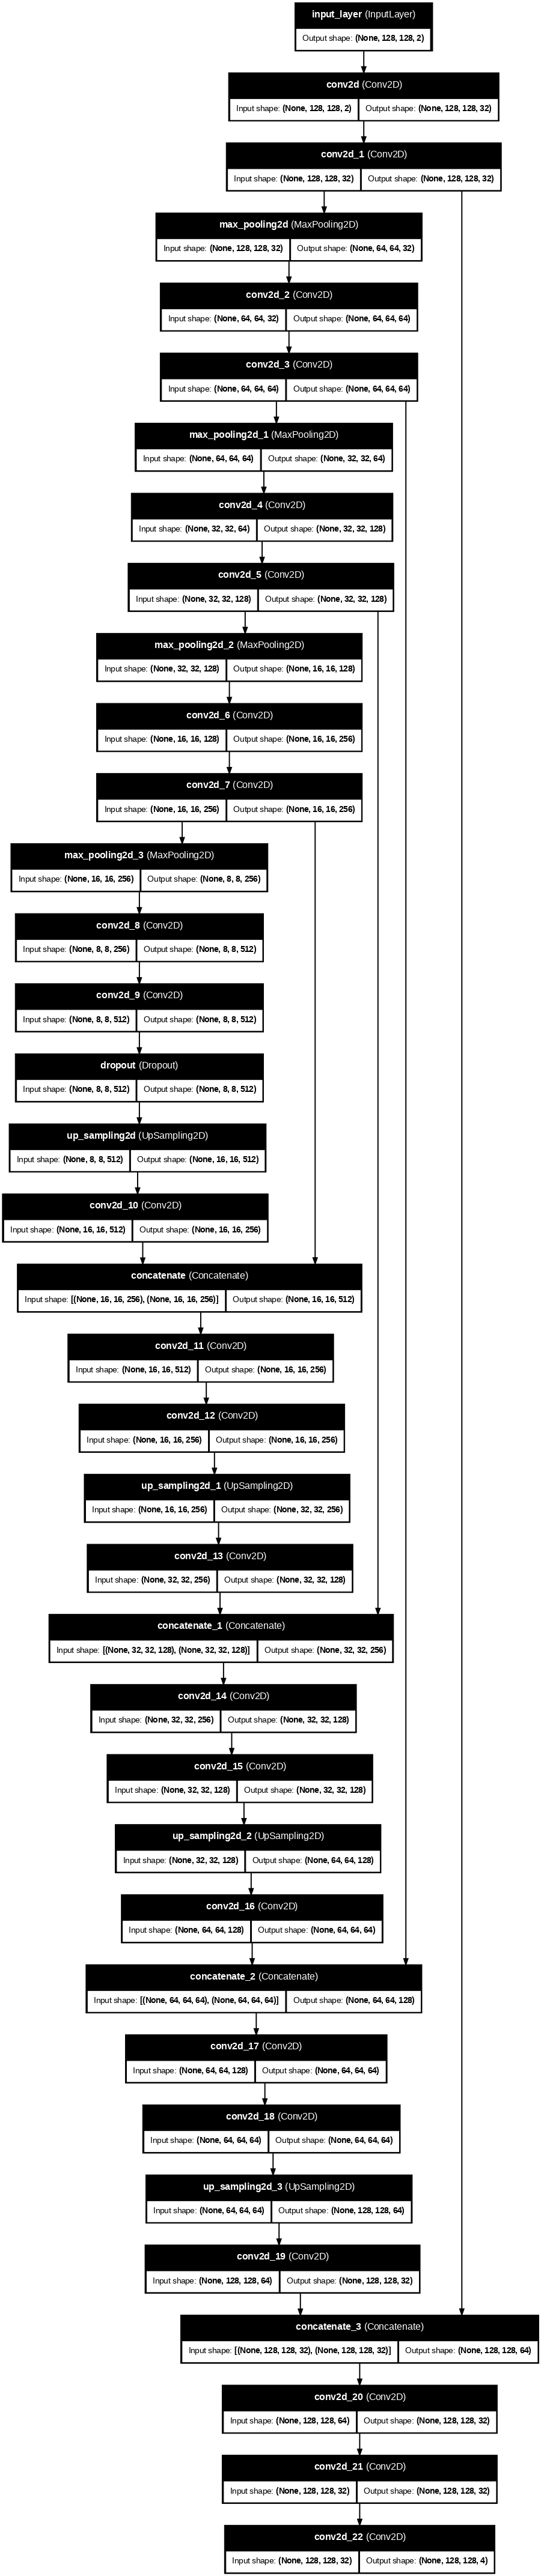

In [ ]:
plot_model(model,
           show_shapes = True,
           show_dtype=False,
           show_layer_names = True,
           rankdir = 'TB',
           expand_nested = False,
           dpi = 70)

In [ ]:
# lists of directories with studies
train_and_val_directories = [f.path for f in os.scandir(TRAIN_DATASET_PATH) if f.is_dir()]

# file BraTS20_Training_355 has ill formatted name for for seg.nii file
train_and_val_directories.remove(TRAIN_DATASET_PATH+'BraTS20_Training_355')


def pathListIntoIds(dirList):
    x = []
    for i in range(0,len(dirList)):
        x.append(dirList[i][dirList[i].rfind('/')+1:])
    return x

train_and_test_ids = pathListIntoIds(train_and_val_directories);


train_test_ids, val_ids = train_test_split(train_and_test_ids,test_size=0.2)
train_ids, test_ids = train_test_split(train_test_ids,test_size=0.15)

In [ ]:
class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, dim=(IMG_SIZE,IMG_SIZE), batch_size = 1, n_channels = 2, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        Batch_ids = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(Batch_ids)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, Batch_ids):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
        y = np.zeros((self.batch_size*VOLUME_SLICES, 240, 240))
        Y = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, 4))


        # Generate data
        for c, i in enumerate(Batch_ids):
            case_path = os.path.join(TRAIN_DATASET_PATH, i)

            data_path = os.path.join(case_path, f'{i}_flair.nii');
            flair = nib.load(data_path).get_fdata()

            data_path = os.path.join(case_path, f'{i}_t1ce.nii');
            ce = nib.load(data_path).get_fdata()

            data_path = os.path.join(case_path, f'{i}_seg.nii');
            seg = nib.load(data_path).get_fdata()

            for j in range(VOLUME_SLICES):
                 X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
                 X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

                 y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];

        # Generate masks
        y[y==4] = 3;
        mask = tf.one_hot(y, 4);
        Y = tf.image.resize(mask, (IMG_SIZE, IMG_SIZE));
        return X/np.max(X), Y

training_generator = DataGenerator(train_ids)
valid_generator = DataGenerator(val_ids)
test_generator = DataGenerator(test_ids)

<ipython-input-21-38dd3b81d534>:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


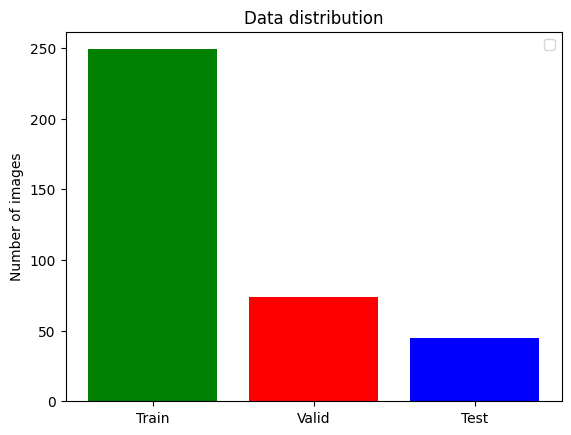

In [ ]:
# show number of data for each dir
def showDataLayout():
    plt.bar(["Train","Valid","Test"],
    [len(train_ids), len(val_ids), len(test_ids)], align='center',color=[ 'green','red', 'blue'])
    plt.legend()

    plt.ylabel('Number of images')
    plt.title('Data distribution')

    plt.show()

showDataLayout()

In [ ]:
csv_logger = CSVLogger('training.log', separator=',', append=False)


callbacks = [
#     keras.callbacks.EarlyStopping(monitor='loss', min_delta=0,
#                               patience=2, verbose=1, mode='auto'),
      keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.000001, verbose=1),
#  keras.callbacks.ModelCheckpoint(filepath = 'model_.{epoch:02d}-{val_loss:.6f}.m5',
#                             verbose=1, save_best_only=True, save_weights_only = True)
        csv_logger
    ]

In [ ]:
K.clear_session()

# history =  model.fit(training_generator,
#                     epochs=35,
#                     steps_per_epoch=len(train_ids),
#                     callbacks= callbacks,
#                     validation_data = valid_generator
#                     )
# model.save("model_x1_1.h5")

## After the U-Net model is Trained

After the model is trained, follow the next steps to predict masks about other brain images

In [ ]:
# Download trained model and model history

!wget --no-check-certificate 'https://drive.google.com/uc?id=1Uex-iFEP11GnwUQbjRFW7u5TRpa0RBUQ' -O pre_trained_model.h5
!wget --no-check-certificate 'https://drive.google.com/uc?id=15j3FHnClU_MkV4WxAK7UfcFrwqyr-NCr' -O training_per_class.log

--2025-05-16 03:41:41--  https://drive.google.com/uc?id=1Uex-iFEP11GnwUQbjRFW7u5TRpa0RBUQ
Resolving drive.google.com (drive.google.com)... 108.177.119.113, 108.177.119.100, 108.177.119.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.119.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Uex-iFEP11GnwUQbjRFW7u5TRpa0RBUQ [following]
--2025-05-16 03:41:41--  https://drive.usercontent.google.com/download?id=1Uex-iFEP11GnwUQbjRFW7u5TRpa0RBUQ
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 108.177.127.132, 2a00:1450:4013:c07::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|108.177.127.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93342248 (89M) [application/octet-stream]
Saving to: ‘pre_trained_model.h5’

pre_trained_model.h 100%[===================>]  89.02M   115MB/s    in 0.8s    

2025-05-16 03:41:47

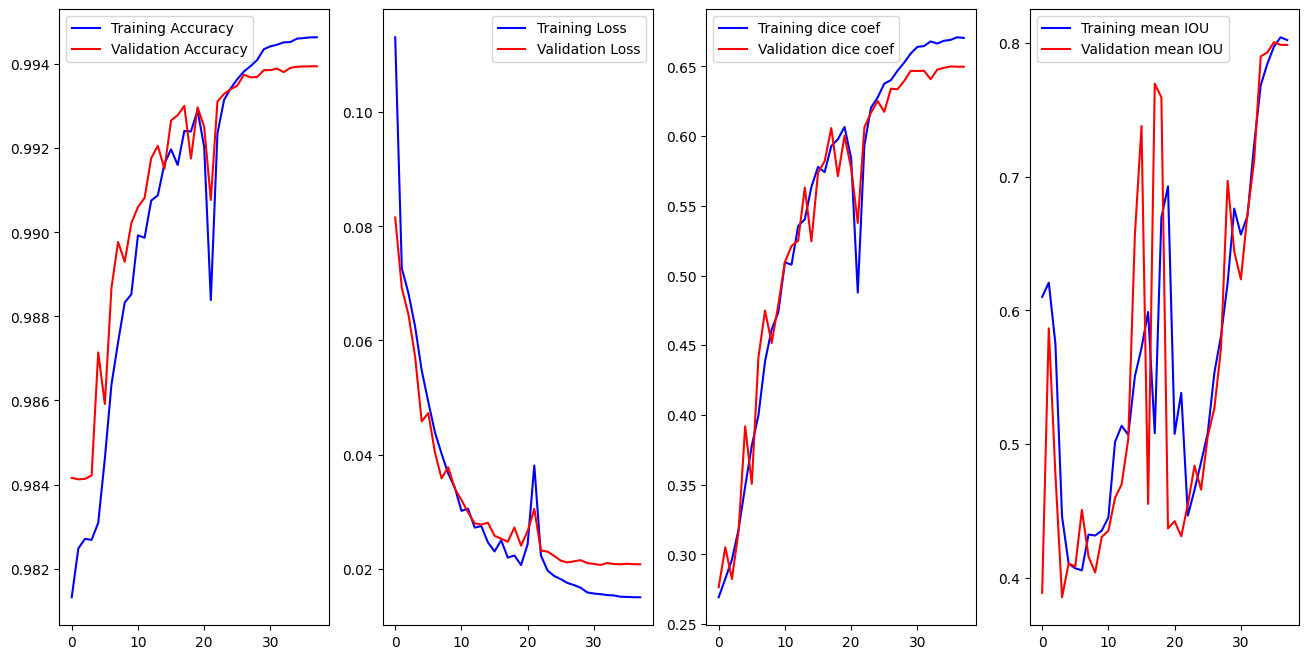

In [ ]:
############ load trained model ################
model = keras.models.load_model('/content/pre_trained_model.h5',
                                   custom_objects={ 'accuracy' : tf.keras.metrics.MeanIoU(num_classes=4),
                                                   "dice_coef": dice_coef,
                                                   "precision": precision,
                                                   "sensitivity":sensitivity,
                                                   "specificity":specificity,
                                                   "dice_coef_necrotic": dice_coef_necrotic,
                                                   "dice_coef_edema": dice_coef_edema,
                                                   "dice_coef_enhancing": dice_coef_enhancing
                                                  }, compile=False)

history = pd.read_csv('/content/training_per_class.log', sep=',', engine='python')

hist=history

############### ########## ####### #######

# hist=history.history

acc=hist['accuracy']
val_acc=hist['val_accuracy']

epoch=range(len(acc))

loss=hist['loss']
val_loss=hist['val_loss']

train_dice=hist['dice_coef']
val_dice=hist['val_dice_coef']

f,ax=plt.subplots(1,4,figsize=(16,8))

ax[0].plot(epoch,acc,'b',label='Training Accuracy')
ax[0].plot(epoch,val_acc,'r',label='Validation Accuracy')
ax[0].legend()

ax[1].plot(epoch,loss,'b',label='Training Loss')
ax[1].plot(epoch,val_loss,'r',label='Validation Loss')
ax[1].legend()

ax[2].plot(epoch,train_dice,'b',label='Training dice coef')
ax[2].plot(epoch,val_dice,'r',label='Validation dice coef')
ax[2].legend()

ax[3].plot(epoch,hist['mean_io_u'],'b',label='Training mean IOU')
ax[3].plot(epoch,hist['val_mean_io_u'],'r',label='Validation mean IOU')
ax[3].legend()

plt.show()

In [ ]:
# mri type must one of 1) flair 2) t1 3) t1ce 4) t2 ------- or even 5) seg
# returns volume of specified study at `path`
def imageLoader(path):
    image = nib.load(path).get_fdata()
    X = np.zeros((self.batch_size*VOLUME_SLICES, *self.dim, self.n_channels))
    for j in range(VOLUME_SLICES):
        X[j +VOLUME_SLICES*c,:,:,0] = cv2.resize(image[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));
        X[j +VOLUME_SLICES*c,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE));

        y[j +VOLUME_SLICES*c] = seg[:,:,j+VOLUME_START_AT];
    return np.array(image)


# load nifti file at `path`
# and load each slice with mask from volume
# choose the mri type & resize to `IMG_SIZE`
def loadDataFromDir(path, list_of_files, mriType, n_images):
    scans = []
    masks = []
    for i in list_of_files[:n_images]:
        fullPath = glob.glob( i + '/*'+ mriType +'*')[0]
        currentScanVolume = imageLoader(fullPath)
        currentMaskVolume = imageLoader( glob.glob( i + '/*seg*')[0] )
        # for each slice in 3D volume, find also it's mask
        for j in range(0, currentScanVolume.shape[2]):
            scan_img = cv2.resize(currentScanVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
            mask_img = cv2.resize(currentMaskVolume[:,:,j], dsize=(IMG_SIZE,IMG_SIZE), interpolation=cv2.INTER_AREA).astype('uint8')
            scans.append(scan_img[..., np.newaxis])
            masks.append(mask_img[..., np.newaxis])
    return np.array(scans, dtype='float32'), np.array(masks, dtype='float32')

#brains_list_test, masks_list_test = loadDataFromDir(VALIDATION_DATASET_PATH, test_directories, "flair", 5)

In [ ]:
print(f"t2 4:{test_image_t2.shape}\nt1 7:{test_image_t1.shape}\nt1ce 2:{test_image_t1ce.shape}\nflair 17:{test_image_flair.shape}")

t2 4:(580, 576, 33)
t1 7:(128, 128, 54)
t1ce 2:(256, 256, 240)
flair 17:(512, 512, 240)


Text(0.5, 1.0, 'Image t1ce')

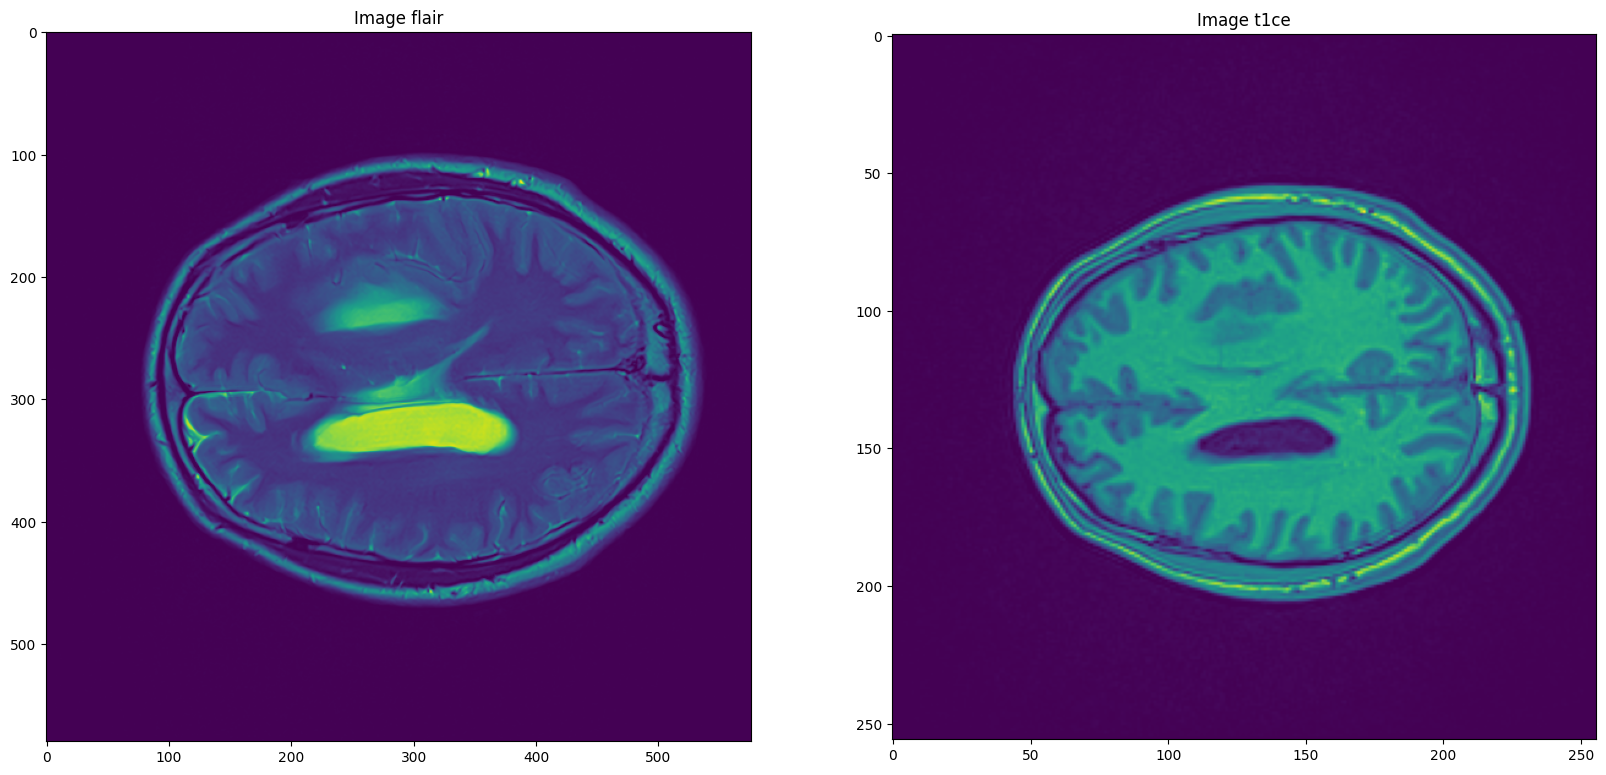

In [ ]:
# The command .get_fdata() returns a 3 dimension numpy array. For example, test_image_flair.shape = (255,255,150)
test_image_flair=nib.load("nii/4.nii.gz").get_fdata()
#test_image_t1=nib.load("nii/7.nii.gz").get_fdata()
test_image_t1ce=nib.load("nii/2.nii.gz").get_fdata()
#test_image_t2=nib.load("nii/4.nii.gz").get_fdata()

# Setear el slice que se encuentre en la altura "48%" según la cantidad de slices de la imagen
#slice_t2 = test_image_t2.shape[2]//2
START_AT = 175
SLICES = 60

fig, (ax1, ax3) = plt.subplots(1,2, figsize = (20, 10))
ax1.imshow(test_image_flair[:,:,21])
ax1.set_title('Image flair')
#ax2.imshow(test_image_t1[:,:,slice_t1])
#ax2.set_title('Image t1')
ax3.imshow(test_image_t1ce[:,:,START_AT])
ax3.set_title('Image t1ce')
#ax4.imshow(test_image_t2[:,:,slice_t2])
#ax4.set_title('Image t2')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
[[[[1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   ...
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]]

  [[1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   ...
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]]

  [[1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   ...
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]]

  ...

  [[1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   ...
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]]

  [[1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   ...
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]
   [1.    0.    0.    0.   ]]

  [[1.    0.    0.    0.   ]
   [1.    0

<Figure size 1800x5000 with 0 Axes>

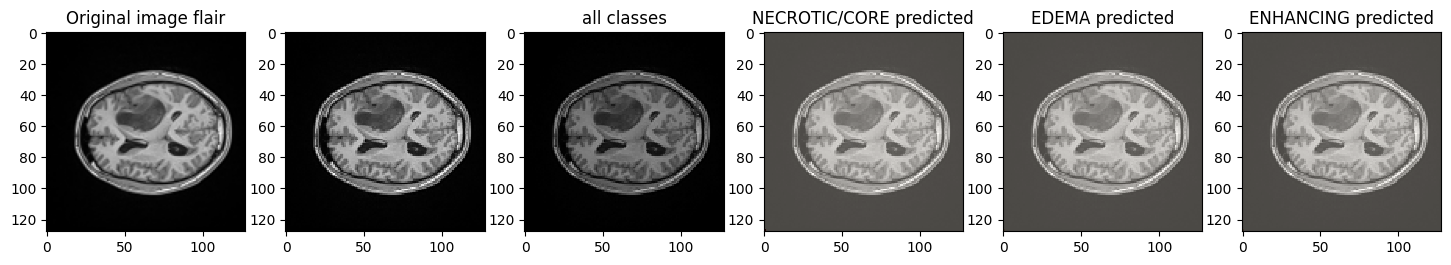

In [ ]:
def predictExampleData():
    X = np.empty((240, 128, 128, 2))

    vol_path = '/content/nii/4.nii.gz'
    flair=nib.load(vol_path).get_fdata()

    vol_path = '/content/nii/2.nii.gz'
    ce=nib.load(vol_path).get_fdata()

    #vol_path = '/content/nii/17.nii.gz'
    #t2=nib.load(vol_path).get_fdata()

    for i in range(12):
        X[i,:,:,0] = cv2.resize(flair[:,:,i+10], (128,128))

    for j in range(SLICES):

        X[j,:,:,1] = cv2.resize(ce[:,:,j+START_AT], (128,128))

    #for j in range(SLICES):

        #X[j,:,:,2] = cv2.resize(t2[:,:,j+START_AT], (128,128))

    return model.predict(X/np.max(X), verbose=1)

start_slice = 135
origImage = nib.load('/content/nii/2.nii.gz').get_fdata()
p = predictExampleData()

print(p)

core = p[:,:,:,1]
edema= p[:,:,:,2]
enhancing = p[:,:,:,3]

plt.figure(figsize=(18, 50))
f, axarr = plt.subplots(1,6, figsize = (18, 50))

for i in range(6): # for each image, add brain background
  axarr[i].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray", interpolation='none')

axarr[0].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray")
axarr[0].title.set_text('Original image flair')
axarr[2].imshow(p[start_slice,:,:,1:4], cmap="Reds", interpolation='none', alpha=0.3)
axarr[2].title.set_text('all classes')
axarr[3].imshow(edema[start_slice,:,:], cmap="OrRd", interpolation='none', alpha=0.3)
axarr[3].title.set_text(f'{SEGMENT_CLASSES[1]} predicted')
axarr[4].imshow(core[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
axarr[4].title.set_text(f'{SEGMENT_CLASSES[2]} predicted')
axarr[5].imshow(enhancing[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
axarr[5].title.set_text(f'{SEGMENT_CLASSES[3]} predicted')
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


<Figure size 1800x5000 with 0 Axes>

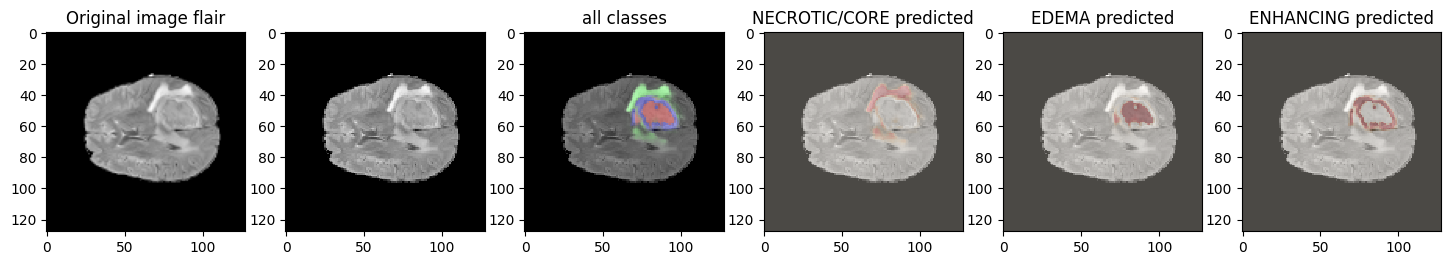

In [ ]:
def predictByPath(case_path,case):
    files = next(os.walk(case_path))[2]
    X = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE, 2))
  #  y = np.empty((VOLUME_SLICES, IMG_SIZE, IMG_SIZE))

    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_flair.nii');
    flair=nib.load(vol_path).get_fdata()

    vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_t1ce.nii');
    ce=nib.load(vol_path).get_fdata()

 #   vol_path = os.path.join(case_path, f'BraTS20_Training_{case}_seg.nii');
 #   seg=nib.load(vol_path).get_fdata()


    for j in range(VOLUME_SLICES):
        X[j,:,:,0] = cv2.resize(flair[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
        X[j,:,:,1] = cv2.resize(ce[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))
 #       y[j,:,:] = cv2.resize(seg[:,:,j+VOLUME_START_AT], (IMG_SIZE,IMG_SIZE))

  #  model.evaluate(x=X,y=y[:,:,:,0], callbacks= callbacks)
    return model.predict(X/np.max(X), verbose=1)



def showPredictsById(case, start_slice = 60):
    path = f"/content/input_folder/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{case}"
    #gt = nib.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
    origImage = nib.load(os.path.join(path, f'BraTS20_Training_{case}_flair.nii')).get_fdata()
    p = predictByPath(path,case)

    core = p[:,:,:,1]
    edema= p[:,:,:,2]
    enhancing = p[:,:,:,3]

    plt.figure(figsize=(18, 50))
    f, axarr = plt.subplots(1,6, figsize = (18, 50))

    for i in range(6): # for each image, add brain background
        axarr[i].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray", interpolation='none')

    axarr[0].imshow(cv2.resize(origImage[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE)), cmap="gray")
    axarr[0].title.set_text('Original image flair')
    #curr_gt=cv2.resize(gt[:,:,start_slice+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE), interpolation = cv2.INTER_NEAREST)
    #axarr[1].imshow(curr_gt, cmap="Reds", interpolation='none', alpha=0.3) # ,alpha=0.3,cmap='Reds'
    #axarr[1].title.set_text('Ground truth')
    axarr[2].imshow(p[start_slice,:,:,1:4], cmap="Reds", interpolation='none', alpha=0.3)
    axarr[2].title.set_text('all classes')
    axarr[3].imshow(edema[start_slice,:,:], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[3].title.set_text(f'{SEGMENT_CLASSES[1]} predicted')
    axarr[4].imshow(core[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[4].title.set_text(f'{SEGMENT_CLASSES[2]} predicted')
    axarr[5].imshow(enhancing[start_slice,:,], cmap="OrRd", interpolation='none', alpha=0.3)
    axarr[5].title.set_text(f'{SEGMENT_CLASSES[3]} predicted')
    plt.show()


showPredictsById(case=test_ids[0][-3:])
#showPredictsById(case=test_ids[1][-3:])
#showPredictsById(case=test_ids[2][-3:])
#showPredictsById(case=test_ids[3][-3:])
#showPredictsById(case=test_ids[4][-3:])
#showPredictsById(case=test_ids[5][-3:])
#showPredictsById(case=test_ids[6][-3:])


# mask = np.zeros((10,10))
# mask[3:-3, 3:-3] = 1 # white square in black background
# im = mask + np.random.randn(10,10) * 0.01 # random image
# masked = np.ma.masked_where(mask == 0, mask)

# plt.figure()
# plt.subplot(1,2,1)
# plt.imshow(im, 'gray', interpolation='none')
# plt.subplot(1,2,2)
# plt.imshow(im, 'gray', interpolation='none')
# plt.imshow(masked, 'jet', interpolation='none', alpha=0.7)
# plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


<Figure size 640x480 with 0 Axes>

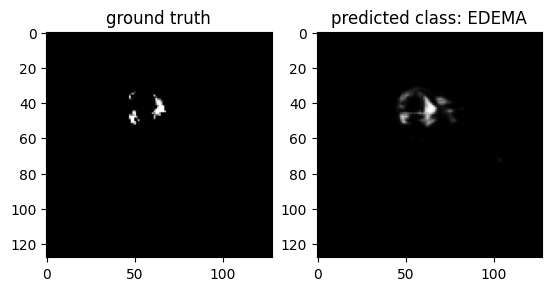

In [ ]:
# Prediction Evaluation

case = case=test_ids[3][-3:]
path = f"/content/input_folder/MICCAI_BraTS2020_TrainingData/BraTS20_Training_{case}"
gt = nib.load(os.path.join(path, f'BraTS20_Training_{case}_seg.nii')).get_fdata()
p = predictByPath(path,case)


core = p[:,:,:,1]
edema= p[:,:,:,2]
enhancing = p[:,:,:,3]


i=40 # slice at
eval_class = 2 #     0 : 'NOT tumor',  1 : 'ENHANCING',    2 : 'CORE',    3 : 'WHOLE'



gt[gt != eval_class] = 1 # use only one class for per class evaluation

resized_gt = cv2.resize(gt[:,:,i+VOLUME_START_AT], (IMG_SIZE, IMG_SIZE))

plt.figure()
f, axarr = plt.subplots(1,2)
axarr[0].imshow(resized_gt, cmap="gray")
axarr[0].title.set_text('ground truth')
axarr[1].imshow(p[i,:,:,eval_class], cmap="gray")
axarr[1].title.set_text(f'predicted class: {SEGMENT_CLASSES[eval_class]}')
plt.show()

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics = ['accuracy',tf.keras.metrics.MeanIoU(num_classes=4), dice_coef, precision, sensitivity, specificity, dice_coef_necrotic, dice_coef_edema, dice_coef_enhancing] )
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model.evaluate(test_generator, batch_size=100, callbacks= callbacks)
print("test loss, test acc:", results)

Evaluate on test data


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 35s 434ms/step - accuracy: 0.9945 - dice_coef: 0.6901 - dice_coef_edema: 0.8405 - dice_coef_enhancing: 0.7963 - dice_coef_necrotic: 0.6701 - loss: 0.0164 - mean_io_u_1: 0.8044 - precision: 0.9946 - sensitivity: 0.9931 - specificity: 0.9982
test loss, test acc: [0.019283663481473923, 0.9938399791717529, 0.8028185963630676, 0.6812523007392883, 0.9940214157104492, 0.9924284219741821, 0.9979749321937561, 0.6885217428207397, 0.7889896035194397, 0.7660720944404602]
